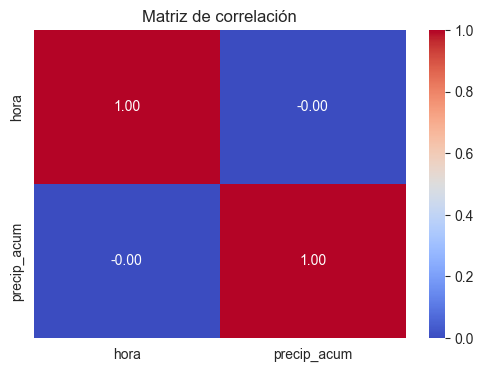

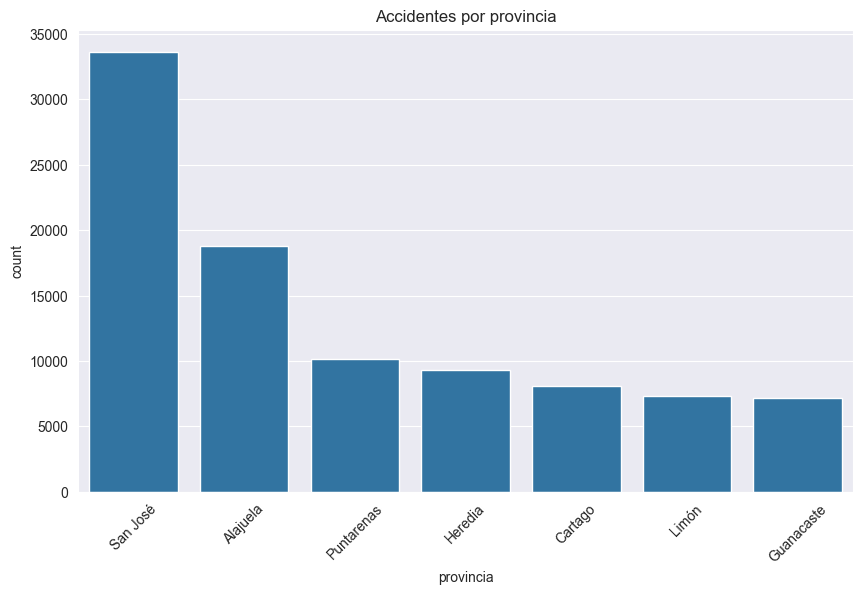

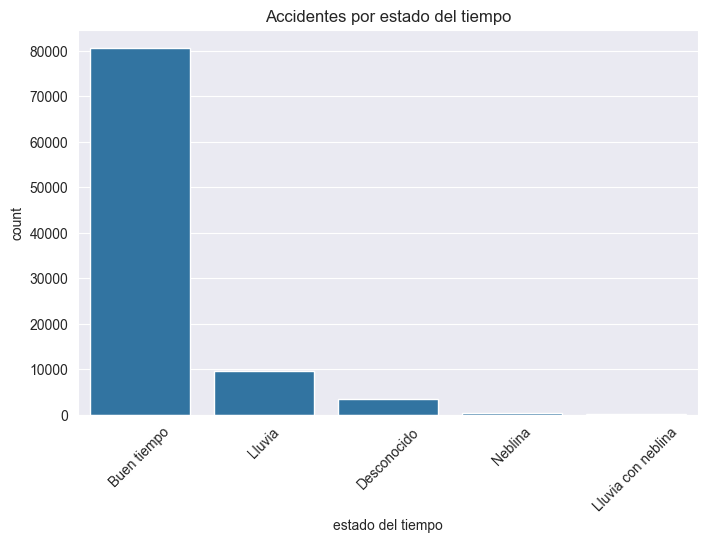

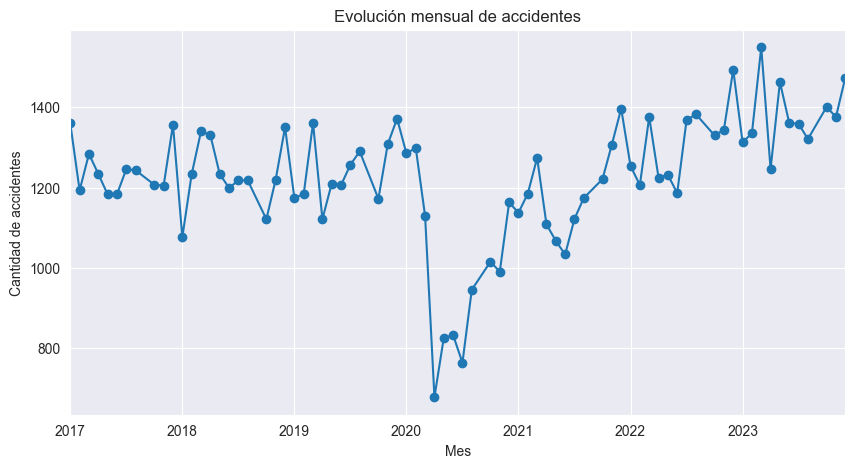

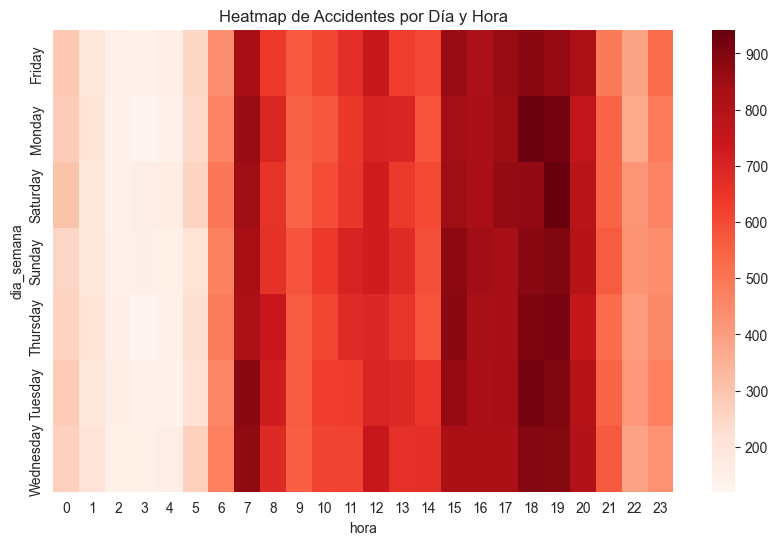

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pandas as pd

# Ruta de tu archivo procesado
DATA_PATH = r"C:\Users\98248\Downloads\PYCHAR\proyecto_accidentes\src\data\processed\accidentes_clima_2023.csv"

# Cargar datos
df = pd.read_csv(DATA_PATH, parse_dates=["fecha"])
df.head()

# ============================
# 1. Matriz de correlación
# ============================
numeric_cols = ["hora", "precip_acum"]
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# ============================
# 2. Boxplot accidentes por provincia
# ============================
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="provincia", order=df["provincia"].value_counts().index)
plt.title("Accidentes por provincia")
plt.xticks(rotation=45)
plt.show()

# ============================
# 3. Boxplot accidentes por estado del tiempo
# ============================
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="estado del tiempo", order=df["estado del tiempo"].value_counts().index)
plt.title("Accidentes por estado del tiempo")
plt.xticks(rotation=45)
plt.show()

# ============================
# 4. Serie temporal mensual
# ============================
df["mes"] = df["fecha"].dt.to_period("M")
acc_mensual = df.groupby("mes").size()

plt.figure(figsize=(10,5))
acc_mensual.plot(kind="line", marker="o")
plt.title("Evolución mensual de accidentes")
plt.ylabel("Cantidad de accidentes")
plt.xlabel("Mes")
plt.show()

# ============================
# 5. Heatmap día vs hora
# ============================
df["dia_semana"] = df["fecha"].dt.day_name()
tabla = pd.crosstab(df["hora"], df["dia_semana"])

plt.figure(figsize=(10,6))
sns.heatmap(tabla.T, cmap="Reds")
plt.title("Heatmap de Accidentes por Día y Hora")
plt.show()
